## Topic 2: QSVM4EO - Land classification using quantum-enhanced support vector machines

This notebook will present examples of using quantum-enhanced support vector machines (QSVM) for classification tasks on multi-spectral Earth Observation (EO) data. The main topics covered are: quick introduction to classical SVM, where quantum computation could be used in the SVM calculations, the intricacies of preparing and encoding the classical data into useful quantum states and training QSVMs on gate-based quantum software simulators. We'll compare the accuracy of different classical and quantum-enhanced SVM models. Some exercises are included at the end of the notebook.

QSVM code is adapted from Qiskit QSVM example: https://qiskit-community.github.io/qiskit-machine-learning/tutorials/03_quantum_kernel.html

## Table of content

1. Introduction
    1. Use case
    2. Theory
        1. Classical SVM
        2. Quantum SVM
2. QSVM Tutorial
3. Exercises
3. Conclusions

## Introduction

### Use case

The proliferation of EO data from diverse sources in recent years has exhibited an exponential growth in both the volume and quality of data. This exponential growth requires new approaches to managing and using the data, taking advantage of advancements in contemporary technologies. Machine Learning (ML) techniques offer promising venues for investigating new ways of gaining insight from the data. Combined with new computing paradigms, like Quantum Computing (QC), this approach is a promising aspect to achieve results faster and, potentially, with higher accuracy. Quantum Machine Learning, a fusion of classical ML and quantum mechanics, leverages entanglement and superposition to uncover hidden data patterns, potentially reducing computational resources and processing time. 

Goals:
- Keep exploring and adding examples to the state of the art of QC4EO
- Investigate setting up HPC-QC pipelines for EO data
- Look for use cases where QML could potentially provide advantage over classical ML
- Evaluate performance of QSVM on “high” amount of data (starting with basic quantum encoding schemes)
- Offloading of processing on satellites once Quantum Computers are available onboard






### Theory

#### Classical Machine Learning and Quantum Machine Learning

Combining quantum computing with machine learning leads to a new and intriguing discipline - quantum machine learning (QML). As we could also have classical or quantum data, we end up with four different combinations, depending of the type of the computation and the type of data used:

<div style="background-color: #ffffff; padding: 10px; text-align: center; width: fit-content;">
  <img src="images/QML_approaches.jpg" width="300"><br>
  <span style="font-style: italic; font-size: 14px;">(Source: Schuld, M. and Petruccione, F. (2021), Machine Learning with Quantum Computers, Springer.)</span>
</div>

The typical flow in training and performing inference with a QML algorithm is similar to classical ML, with two extra steps. Since we’re dealing with classical data, it needs to be converted into quantum data. This is done in the `Input encoding step` (also called `state preparation`) and it’s not a trivial step and has great repercussions on the performance of the model. Once the processing is done on the quantum computer, to get access to the result a `Read out` or `measurement` step needs to be performed, as the information in the qubits is not directly accessible.

<div style="background-color: #ffffff; padding: 10px; text-align: center; width: fit-content;">
  <img src="images/QML_general_workflow.jpg" width="400"><br>
  <span style="font-style: italic; font-size: 14px;">(Source: Schuld, M. and Petruccione, F. (2021), Machine Learning with Quantum Computers, Springer.)</span>
</div>

Classical data needs to be converted to quantum states before it could be manipulated by quantum computers. There are different `quantum encoding`(sometimes also called also `quantum embedding` or `quantum feature map`) techniques, all with the common goal of translating a classical datapoint $x$ into the state of qubits or parameters of quantum gates with the final goal of creating an initial quantum state $\mid\psi\rangle$, dependent on the initial datapoint. Three popular basic quantum encoding are `basis encoding`, `amplitude encoding` and `rotation encoding`. The rotation encoding` applies a parametrized rotation gate to a qubit (for example Pauli Z rotation) for each classical data feature.

<div style="background-color: #ffffff; padding: 10px; text-align: center; width: fit-content;">
  <img src="images/Bloch_sphere.jpg" width="300"><br>
  <span style="font-style: italic; font-size: 14px;"></span>
</div>

#### Support Vector Machines (SVM)

The SVM algorithm, in it’s original linear definition, is very similar to the linear classifier. But instead of trying to find any hyperplane separating the two data classes, it’s goal is to find the maximum margin between them with the assumption that they are linearly separable.

<div style="background-color: #ffffff; padding: 10px; text-align: center; width: fit-content;">
  <img src="images/SVM_margin.png" width="300"><br>
  <span style="font-style: italic; font-size: 14px;">(Source: https://commons.wikimedia.org/wiki/File:SVM_margin.png)</span>
</div>

##### Primal formulation

The primal formulation of SVM is as follows:

$$
\mathbf{w}^{\top} \mathbf{x}-b=0
$$

This could be reformulated as an optimization problem:

$$
\underset{\mathbf{w}, b}{\operatorname{argmin}} \frac{1}{2}\|\mathbf{w}\|^{2}
$$

with the following constraints:

$$
\begin{aligned}
\mathbf{w}^{\top} \mathbf{x}_{i}-b \geq 1 & \text { for } y_{i}=1 \\
\mathbf{w}^{\top} \mathbf{x}_{i}-b \leq-1 & \text { for } y_{i}=-1
\end{aligned}
$$

##### Dual Lagrangian formulation

In practice the Dual Lagrangian formulation is used:

$$
\mathcal{L}(\boldsymbol{\alpha})=\sum_{n=1}^{N} \alpha_{n}-\frac{1}{2} \sum_{n=1}^{N} \sum_{m=1}^{N} y_{n} y_{m} \alpha_{n} \alpha_{m} \mathbf{x}_{n}^{\top} \mathbf{x}_{m}
$$

Maximize w.r.t. to $\alpha$ subject to:

$$
\begin{array}{r}
\alpha_n \geq 0 \text { for } n=1, \cdots, N \\
\qquad \sum_{n=1}^N \alpha_n y_n=0
\end{array}
$$

In this formulation the values of the Lagrangian multipliers $\alpha$ could be found with quadratic programming.

##### Kernel trick

The above formulations work for linearly separable data, but the real-world datasets are rarely linearly separable. In cases where the data points are intermixed, one could use a transformation function that is applied to the original datapoints $x_i$ that maps them to a new feature space. The hope is that in this new feature space the mapped datapoints $z_i$ are linearly separable. 

<div style="background-color: #ffffff; padding: 10px; text-align: center; width: fit-content;">
  <img src="images/SVM_kernel.png" width="600"><br>
  <span style="font-style: italic; font-size: 14px;">(Source: https://www.hackerearth.com/blog/developers/simple-tutorial-svm-parameter-tuning-python-r/
  )</span>
</div>

$$
\mathcal{L}(\boldsymbol{\alpha})=\sum_{n=1}^{N} \alpha_{n}-\frac{1}{2} \sum_{n=1}^{N} \sum_{m=1}^{N} y_{n} y_{m} \alpha_{n} \alpha_{m} \mathbf{z}_{n}^{\top} \mathbf{z}_{m}
$$

subject to:

$$
\begin{array}{r}
\alpha_n \geq 0 \text { for } n=1, \cdots, N \\
\qquad \sum_{n=1}^N \alpha_n y_n=0
\end{array}
$$

Computing those new datapoints $z_i$ could be quite computationally expensive. To avoid it we could apply the kernel trick: instead of computing each new datapoint in the new feature space, what we need is some measure of distance between the datapoint vectors, for example their dot product, as seen in the equation above. So if we could compute it directly, by using the data in the original input space, we could speed up the computation and get access to kernels in infinite dimensions (for example the RBF kernel).

Some classical kernel functions:

$$
\begin{array}{l|l|l}
\hline \text { Name } & \text { Kernel } & \text { Hyperparameters } \\
\hline \text { Linear } & \mathbf{x}^{T} \mathbf{x}^{\prime} & - \\
\hline \text { Polynomial } & \left(\mathbf{x}^{T} \mathbf{x}^{\prime}+c\right)^{p} & p \in \mathbb{N}, c \in \mathbb{R} \\
\hline \text { Gaussian } & \mathrm{e}^{-\gamma\left\|\mathbf{x}-\mathbf{x}^{\prime}\right\|^{2}} & \gamma \in \mathbb{R}^{+} \\
\hline \text { Exponential } & \mathrm{e}^{-\gamma\left\|\mathbf{x}-\mathbf{x}^{\prime}\right\|} & \gamma \in \mathbb{R}^{+} \\
\hline \text { Sigmoid } & \tanh \left(\mathbf{x}^{T} \mathbf{x}^{\prime}+c\right) & c \in \mathbb{R} \\
\hline
\end{array}
$$

#### Quantum-enhanced Support Vector Machines (QSVM)

##### Quantum Dot product

 A single qubit state is mathematically defined as a unit vector in a two-dimensional complex vector space, i.e. a Hilbert Space. We could write the qubit state would be by using the vector notation - this is called a `ket` :

 $$
|\psi\rangle=\left[\begin{array}{l}
\alpha \\
\beta
\end{array}\right]
$$

As the coefficients (or amplitudes) $\alpha$ and $\beta$ are complex number, we can take their conjugates $\bar{\alpha}$ and $\bar{\beta}$:

$$
\begin{aligned}
\alpha & =x_0+i y_0 \\
\bar{\alpha} & =x_0-i y_0
\end{aligned}
$$

The conjugates helps us introduce the complement of a `ket`, called a `bra`, which is it’s conjugate transpose:

$$
\langle\psi|=|\psi\rangle^{\dagger}=\left[\begin{array}{ll}
\bar{\alpha} & \bar{\beta}
\end{array}\right]
$$

With this notation it becomes very easy to write dot products of quantum states in Hilbert space - for example the dot product of the state $\mid \psi\rangle$ with itself is defined as follows:

$$
\langle\psi \mid \psi\rangle=|\alpha|^2+|\beta|^2=1
$$

##### Quantum Kernels

Constructing quantum kernels is surprisingly simple. One approach is to first encode feature $x_n$ using rotation encoding routine $S(x_n)$. This produces a quantum state $\mid \phi\rangle$, parametrized on $x_n$. Then we reuse the same quantum circuit and this time encode feature $x_m$ using the inverse embedding $S(x_m)^†$, which produces a quantum state $\langle \phi\mid$, this time parametrized on $x_m$. This now forms a circuit, which is the dot product of the two encoded states, which defines a distance measure in Hilbert space. The last step is to perform projective measurement on the initial state, which produces the following quantum embedding kernel (QEK), dependent only on the two original classic data features $x_n$ and $x_m$:

$$
k\left(\boldsymbol{x_n}, \boldsymbol{x_m}\right)=\left|\left\langle\phi\left(\boldsymbol{x_m}\right) \mid \phi(\boldsymbol{x_n})\right\rangle\right|^{2}
$$

By encoding the data into quantum Hilbert Space in a clever way and without doing any additional operations we’re able to get a kernel producing a distance measure between datapoints.

<div style="background-color: #ffffff; padding: 10px; text-align: center; width: fit-content;">
  <img src="images/kernel_circuit.png" width="600"><br>
  <span style="font-style: italic; font-size: 14px;">(Source: https://pennylane.ai/qml/demos/tutorial_kernel_based_training)</span>
</div>

Now we could put everything together and define a quantum-enhanced version of Quantum Support Vector Machines (QSVM). In this particular version of QSVM all the classical computation steps in training a model and performing inference stay the same, with the exception of the computation of the kernel matrix, which is performed on a quantum computer or quantum software simulator. The dual Lagrangian is modified as follows:

$$
\mathcal{L}(\boldsymbol{\alpha})=\sum_{n=1}^N \alpha_n-\frac{1}{2} \sum_{n=1}^N \sum_{m=1}^N y_n y_m \alpha_n \alpha_m\left|\left\langle\phi\left(x_n\right) \mid \phi\left(x_m\right)\right\rangle\right|^2
$$

where $\phi(x_i)$ is a quantum feature map, encoding the classical data vector $x_i$ into quantum Hilbert space.

Comparison of the steps of a classical and quantum-enhanced SVM is shown below: 

<div style="background-color: #ffffff; padding: 10px; text-align: center; width: fit-content;">
  <img src="images/SVM_QSVM_workflows.png" width="600"><br>
  <span style="font-style: italic; font-size: 14px;"></span>
</div>

## QSVM Tutorial

### Imports, global variables and common functions

In [50]:
### Imports
import numpy as np
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap
import seaborn as sns

from qiskit.circuit.library import ZZFeatureMap, ZFeatureMap
from qiskit_machine_learning.kernels import FidelityStatevectorKernel

%matplotlib inline

In [51]:
### Global variables

accuracy_results = {}
predicted_labels = {}

In [52]:
### Common functions

def read_csv(file_dir, selected_columns):
    """Reads a CSV data file and returns requested data columns, as well as a label"""
    df = pd.read_csv(file_dir)
    df_selected = df[selected_columns]
    X = df_selected.values
    Y = df['Label'].values
    return X,Y

def plot_confusion_matrix(y_true, y_pred, classifier_name):
    """Plots a confusion matrix"""
    class_names = ['1', '2', '3']
    label_order = [1, 2, 3]

    # Confusion matrix and normalization
    cm = confusion_matrix(y_true, y_pred, labels=label_order)
    cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

    # Plot
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm_percent, annot=True, fmt=".1f", cmap="Blues",
                xticklabels=class_names, yticklabels=class_names,
                cbar_kws={'label': 'Percentage (%)'})
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix for classifier {classifier_name} (%)')
    plt.tight_layout()

def plot_prediction_raster(preds, title="Prediction"):
    """Plots predicted labels as an image"""
    # === CONFIG ===
    image_shape = (32, 32)
    label_map = {1: 'Urban areas', 2: 'Agricultural areas', 3: 'Forests and semi-natural areas'}
    label_colors = {
        1: '#1f77b4',  # Blue
        2: '#2ca02c',  # Green
        3: '#d62728'   # Red
    }
    color_list = ['#cccccc'] + [label_colors[i] for i in sorted(label_colors.keys())]
    cmap = ListedColormap(color_list[1:])  # Skipping placeholder for index 0

    # # === CHECKS ===
    if len(preds) != image_shape[0] * image_shape[1]:
        raise ValueError(f"Expected {image_shape[0] * image_shape[1]} values, got {len(preds)}")

    # === PLOT ===
    array = preds.reshape(image_shape)
    plt.figure(figsize=(2, 2))
    plt.imshow(array, cmap=cmap, vmin=1, vmax=3)
    plt.axis('off')
    plt.title(title)

    # Legend
    # patches = [mpatches.Patch(color=label_colors[i], label=label_map[i]) for i in label_map]
    # plt.legend(handles=patches, loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=3, fontsize='small')
    plt.tight_layout()
    plt.show()

def plot_accuracy(accuracy_data):
    """Plots prediction accuracies as a bar chart """
    # Extract labels and values
    labels = list(accuracy_data.keys())
    values = list(accuracy_data.values())

    # Create the plot
    plt.figure(figsize=(8, 5))
    plt.bar(labels, values, color='skyblue')
    plt.xlabel('Classifier')
    plt.ylabel('Accuracy')
    plt.title('Bar plot of classifier accuracy')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

### Dataset

Dataset source: MultiSen – France, South-West – https://zenodo.org/records/6375466

- Sentinel-2 multi-spectral data with labels:
  - Bands 02, 03, 04 and 08 values for each of the selected pixels was extracted
  - NDVI, EVI, SAVI and NDWI indices were calculated and added


<div style="background-color: #ffffff; padding: 10px; text-align: center; width: fit-content;">
  <img src="images/Sentinel2_Spectral_Bands.png" width="600"><br>
  <span style="font-style: italic; font-size: 14px;">(Source: https://www.researchgate.net/figure/Sentinel-2-MSI-spectral-bands-vs-spatial-resolution-with-corresponding-Full-Width-at_fig14_349312687</span>
</div>

Tiles: Two rural regions with size 32*32 in south-western France selected. Each tile contains pixels in one of the follow 3 categories:
- Urban areas
- Agricultural areas
- Forests and semi-natural areas

Train tile:
<div>
  <img src="images/train_chip_rgb.png" height="300" style="display: inline-block; margin-right: 10px;">
  <img src="images/train.png" height="300" style="display: inline-block; margin-right: 10px;">
  <img src="images/label_distribution_barchart_train.png" height="300"  style="display: inline-block;">
</div>
Test tile:
<div>
  <img src="images/test_chip_rgb.png" height="300" style="display: inline-block; margin-right: 10px;">
  <img src="images/test.png" height="300" style="display: inline-block; margin-right: 10px;">
  <img src="images/label_distribution_barchart_test.png" height="300"  style="display: inline-block;">
</div>

### Load dataset

In [53]:
train_data = 'data/train_32.csv'
test_data = 'data/test_32.csv'

data_labels = ['B02', 'B03', 'B04', 'B08']
dim = len(data_labels)

train_features, train_labels = read_csv(train_data, data_labels)
test_features, test_labels = read_csv(test_data, data_labels)

In [75]:
print(train_features)

[[ 780  893 1295 3314]
 [ 816  957 1442 3061]
 [ 833 1025 1442 3061]
 ...
 [1122 1409 1615 2903]
 [1299 1427 1615 2903]
 [1286 1305 1263 2550]]


### SVM classifiers

In [54]:
svm_classifier_kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for svm_classifier_kernel in svm_classifier_kernels: 

    svc_classifier = SVC(kernel=svm_classifier_kernel)
    svc_classifier.fit(train_features, train_labels)

    train_score = svc_classifier.score(train_features, train_labels)
    test_score = svc_classifier.score(test_features, test_labels)
    predicted_test_labels = svc_classifier.predict(test_features)

    accuracy_results[f'{svm_classifier_kernel}_{dim}f'] = test_score
    predicted_labels[f'{svm_classifier_kernel}_{dim}f'] = predicted_test_labels

    print(f"Classical kernel {svm_classifier_kernel} classification test score: {test_score}")

Classical kernel linear classification test score: 0.5869140625
Classical kernel poly classification test score: 0.6494140625
Classical kernel rbf classification test score: 0.5400390625
Classical kernel sigmoid classification test score: 0.5732421875


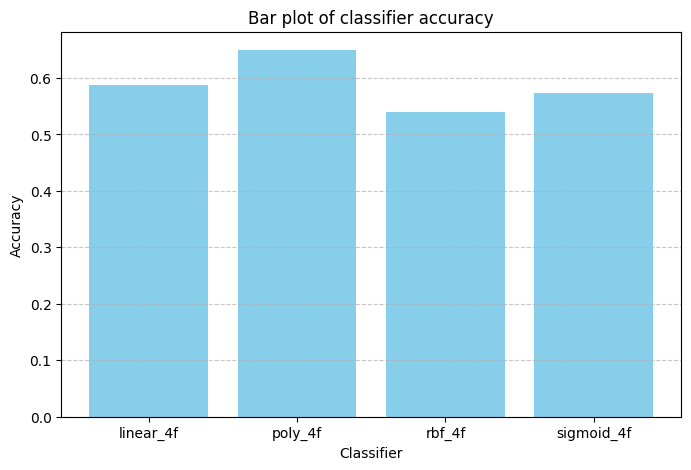

In [55]:
plot_accuracy(accuracy_results)

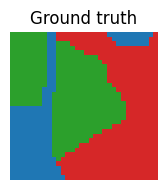

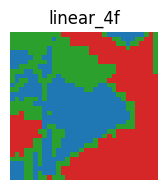

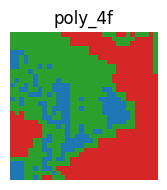

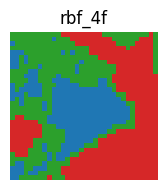

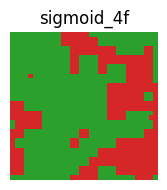

In [56]:
plot_prediction_raster(test_labels, "Ground truth")

for key, value in predicted_labels.items():
    plot_prediction_raster(value, key)


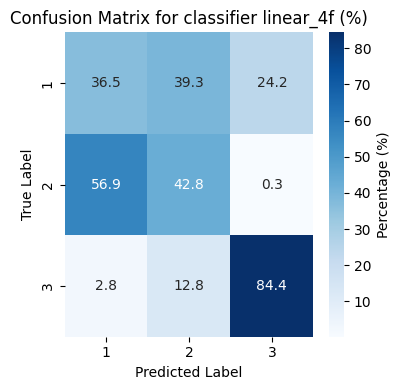

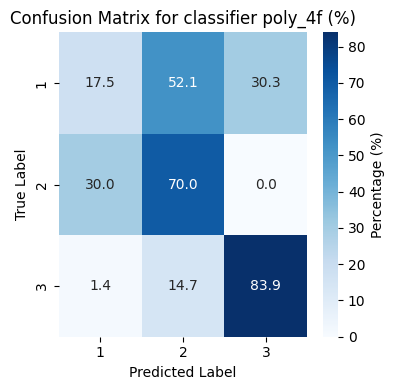

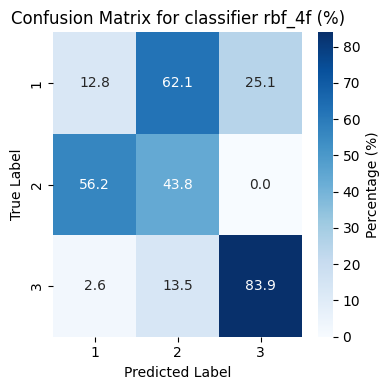

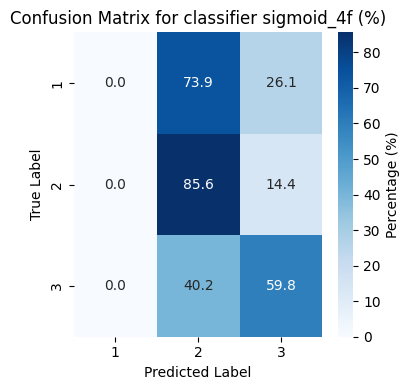

In [57]:
for key, value in predicted_labels.items():
    plot_confusion_matrix(test_labels, value, key)

### Quantum-enhanced SVM classifier

In [58]:
### Scale the data
scaler = StandardScaler().fit(train_features)
train_features_scaled = scaler.transform(train_features)
test_features_scaled = scaler.transform(test_features)

### Quantum data encoding with ZFeatureMap

In [59]:
# Quantum data encoding circuit repetitions
qec_repetitions = 1

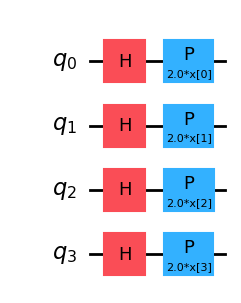

In [76]:
# Create a ZFeatureMap with specified feature dimension and repetitions
q_feature_map = ZFeatureMap(feature_dimension=dim, reps=qec_repetitions)

# Initialize a quantum kernel based on the feature map
q_kernel = FidelityStatevectorKernel(feature_map=q_feature_map)

# Draw the feature map circuit
_ = q_kernel.feature_map.decompose().draw("mpl")


### Compute the quantum kernel and train the quantun-enhanced SVM

In [61]:

# Compute the kernel matrix for the training features using the custom quantum kernel
q_matrix_train = q_kernel.evaluate(x_vec=train_features_scaled)

In [62]:
# Create an SVM classifier that uses a precomputed kernel matrix
q_svc = SVC(kernel="precomputed")

# Train the SVM using the precomputed kernel matrix and corresponding labels
_ = q_svc.fit(q_matrix_train, train_labels)

### Inference with the quantum-enhanced SVM

In [63]:
# Compute the test kernel matrix between test and training features for SVM prediction
q_matrix_test = q_kernel.evaluate(x_vec=test_features_scaled, y_vec=train_features_scaled)

In [64]:
q_score_precomputed_kernel = q_svc.score(q_matrix_test, test_labels)

predicted_test_labels = q_svc.predict(q_matrix_test)

accuracy_results[f'z_{dim}f'] = q_score_precomputed_kernel
predicted_labels[f'z_{dim}f'] = predicted_test_labels

print(f"Precomputed quantum kernel classification test score: {q_score_precomputed_kernel}")

Precomputed quantum kernel classification test score: 0.6455078125


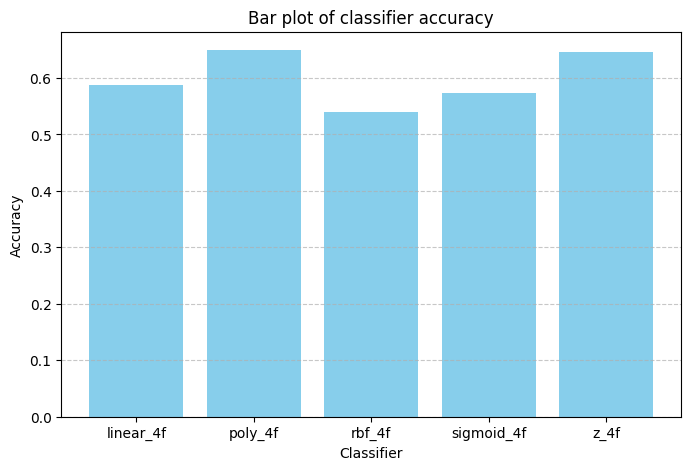

In [65]:
plot_accuracy(accuracy_results)

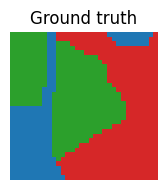

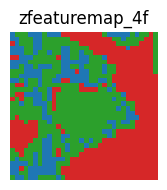

In [66]:
plot_prediction_raster(test_labels, "Ground truth")
plot_prediction_raster(predicted_test_labels, f'zfeaturemap_{dim}f')

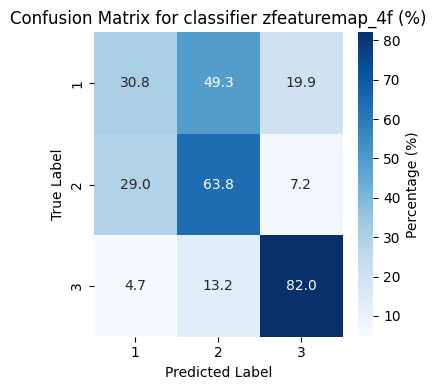

In [67]:
plot_confusion_matrix(test_labels, predicted_test_labels, f'zfeaturemap_{dim}f')

### Quantum data encoding with ZZFeatureMap

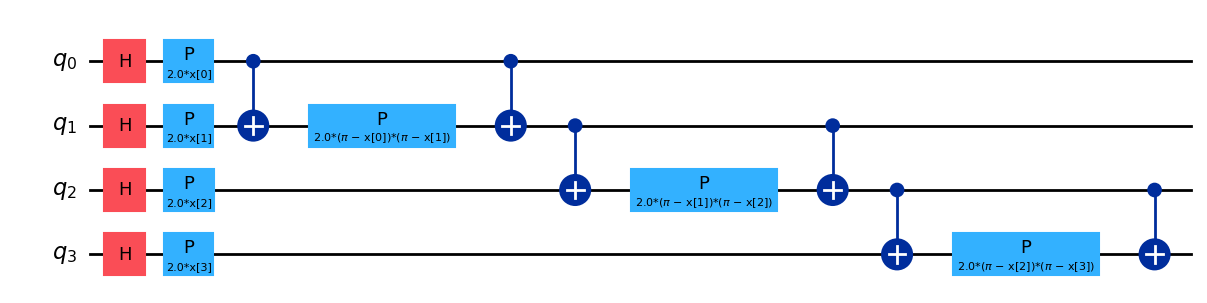

In [77]:
### Available entanglement options: "linear", "circular", "sca", "full"
q_feature_map = ZZFeatureMap(feature_dimension=dim, reps=qec_repetitions, entanglement="linear")
q_kernel = FidelityStatevectorKernel(feature_map=q_feature_map)
_ = q_kernel.feature_map.decompose().draw("mpl")

In [69]:
q_matrix_train = q_kernel.evaluate(x_vec=train_features_scaled)
q_svc = SVC(kernel="precomputed")
_ = q_svc.fit(q_matrix_train, train_labels)

In [70]:
q_matrix_test = q_kernel.evaluate(x_vec=test_features_scaled, y_vec=train_features_scaled)
q_score_precomputed_kernel = q_svc.score(q_matrix_test, test_labels)

predicted_test_labels = q_svc.predict(q_matrix_test)

accuracy_results[f'zz_lin_{dim}f'] = q_score_precomputed_kernel
predicted_labels[f'zz_lin_{dim}f'] = predicted_test_labels

print(f"Precomputed quantum kernel classification test score: {q_score_precomputed_kernel}")

Precomputed quantum kernel classification test score: 0.52734375


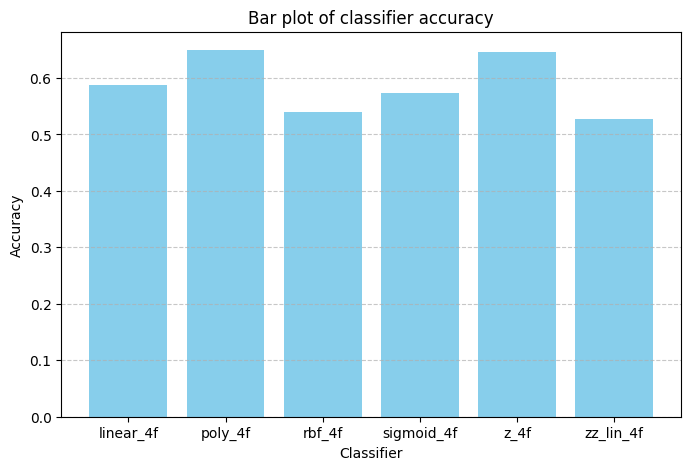

In [71]:
plot_accuracy(accuracy_results)

## Exercises

1. Use different entanglement options for the ZZFeatureMap. Which ones are the best? Is any of them better that ZFeautureMap?
2. Select one or more quantum feature maps and increase the number of repetitions of a quantum encoding layer  (parameter `qec_repetitions`). Do you observe any change in test accuracy?
3. Use all eight features from the dataset and repeat the experiments above with the classical and quantum-enhanced SVMs. Is there a change in the accuracy?

### Exercise 1

In [72]:
### Available entanglement options: "linear", "circular", "sca", "full"

#YOUR CODE HERE

### Exercise 2

In [ ]:
# Quantum data encoding circuit repetitions
qec_repetitions = 1 # <= YOUR CHOICE HERE

In [ ]:
# YOUR CODE HERE

### Exercise 3

In [ ]:
### Data loading

data_labels = ['B02', 'B03', 'B04', 'B08', 'NDVI', 'EVI', 'SAVI', 'NDWI']
dim = len(data_labels)

In [ ]:
### Classical SVM

# YOUR CODE HERE

In [ ]:
### Quantum-enhanced SVM

# YOU CODE HERE

## Conclusions and future work

Conclusions:
- QSVM shows promising potential in the EO use case
- Some quantum encoding schemes perform on par with the best classical SVM kernels

Future work:
- Investigate other quantum encoding schemes
- Investigate other quantum computing modalities – ie analog quantum computing
- Investigate other quantum machine learning techniques – ie quantum reservoir computing
- Run on actual quantum hardware



## References
- http://work.caltech.edu/slides/slides14.pdf
- https://arxiv.org/abs/1803.07128
- https://arxiv.org/abs/2101.11020
- https://qiskit-community.github.io/qiskit-machine-learning/tutorials/03_quantum_kernel.html
- https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.library.ZFeatureMap
- https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.library.ZZFeatureMap
- https://pennylane.ai/qml/demos/tutorial_kernel_based_training

## Acknowledgements

We extend our gratitude to the Irish Centre for High-End Computing (ICHEC) and University of Galway for providing computing and for all-encompassing invaluable support. This project was funded by the EuroHPC JU under grant agreement No 951732 and Ireland.

<div>
  <img src="../logos/ICHEC.png" height="100" style="display: inline-block; margin-right: 15px;">
  <img src="../logos/UoG_.png" height="100" style="display: inline-block; margin-right: 15px;">
  <img src="../logos/EuroCC-Ireland.png" height="100" style="display: inline-block; margin-right: 15px;">
  <img src="../logos/EU-flag-Horizon-Europe.jpg" height="100" style="display: inline-block;">
</div>